## Title :
Exercise: Hypothesis Testing

## Description :

The goal of this exercise is to identify the relevant features of the dataset using **Hypothesis testing** and to plot a bar plot like the one given below:

![fig4](fig/fig4.png)

## Data Description:

## Instructions:

- Read the file `Advertising.csv` as a dataframe.
- Fit a simple multi-linear regression with "medv" as the response variable and the remaining columns as the predictor variables.
- Compute the coefficients of the model and plot a bar chart to depict these values.
- To find the distributions of the coefficients perform bootstrap.
- For each bootstrap:
    - Fit a simple multi-linear regression with the same conditions as before.
    - Compute the coefficient values and store as a list.
- Compute the |t|∣t∣ values for each of the coefficient value in the list.
- Plot a bar chart of the varying |t|∣t∣ values.
- Compute the p-value from the |t|∣t∣ values.
- Plot a bar chart of 1-p1−p values of the coefficients. Also mark the 0.95 line on the chart as shown above.

## Hints: 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">pd.read_csv(filename)</a>
Returns a pandas dataframe containing the data and labels from the file data

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html" target="_blank">sklearn.preprocessing.normalize()</a>
Scales input vectors individually to unit norm (vector length).

<a href="https://numpy.org/doc/stable/reference/generated/numpy.interp.html" target="_blank">np.interp()</a>
Returns one-dimensional linear interpolation

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Splits the data into random train and test subsets

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a>
LinearRegression fits a linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model.

**Note:** This exercise is **auto-graded and you can try multiple attempts**.

In [1]:
# Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# Read the file "Advertising.csv" as a dataframe
df = pd.read_csv("data/Advertising.csv",index_col=0)

# Take a quick look at the dataframe
df.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Get all the columns except 'sales' as the predictors
X = df.drop(['sales'],axis=1)

# Select 'sales' as the response variable
y = df['sales']


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a linear regression model with normalize=True
lreg = LinearRegression()

# Fit the model on the entire data
lreg.fit(X_scaled, y)


LinearRegression()

In [6]:
# Get the coefficient of each predictor as a dictionary
coef_dict = dict(zip(df.columns[:-1], np.transpose(lreg.coef_)))
predictors,coefficients = list(zip(*sorted(coef_dict.items(),key=lambda x: x[1])))


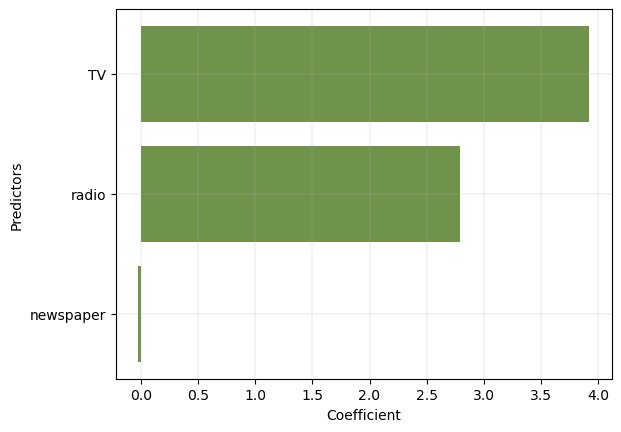

In [7]:
# Helper code to visualize the coefficients of all predictors
fig, ax = plt.subplots()
ax.barh(predictors,coefficients, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
plt.show()


In [8]:
# Helper function to compute the t-statistic 
def get_t(arr):
    means = np.abs(arr.mean(axis=0))
    stds = arr.std(axis=0)
    return np.divide(means,stds)


In [9]:
# Initialize an empty list to store the coefficient values
coef_dist = []

# Set the number of bootstraps
numboot = 1000

# Loop over the all the bootstraps
for i in range(numboot):

    # Get a bootstrapped version of the dataframe
    df_new = df.sample(frac=1,replace=True)

    # Get all the columns except 'sales' as the predictors
    X = df_new.drop(['sales'],axis=1)
    X_scaled = scaler.fit_transform(X)

    # Select 'sales' as the response variable
    y = df_new['sales']

    # Initialize a linear regression model with normalize=True
    lreg = LinearRegression()

    # Fit the model on the entire data
    lreg.fit(X_scaled, y)

    # Append the coefficients of all predictors to the list
    coef_dist.append(lreg.coef_)

# Convert the list to a numpy array
coef_dist = np.array(coef_dist)


In [10]:
# Use the helper function get_t to find the T-test values
tt = get_t(coef_dist)
n = df.shape[0]


In [11]:
# Get the t-value associated with each predictor
tt_dict = dict(zip(df.columns[:-1], tt))
predictors, tvalues = list(zip(*sorted(tt_dict.items(),key=lambda x:x[1])))


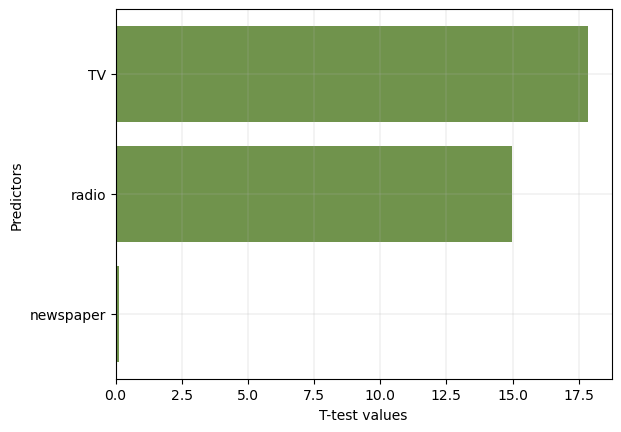

In [12]:
# Helper code below to visualise the t-values
fig, ax = plt.subplots()
ax.barh(predictors,tvalues, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("T-test values")
ax.set_ylabel("Predictors")
plt.show();


In [14]:
### edTest(test_pval) ###

# From t-test values compute the p values using scipy.stats 
# T-distribution function
pval = stats.t.sf(tt, n-1)*2

# Here we use sf i.e 'Survival function' which is 1 - CDF of the t distribution.
# We also multiply by two because its a two tailed test.
# Please refer to lecture notes for more information

# Since p values are in reversed order, we find the 'confidence' 
# which is 1-p
conf = 1-pval


In [15]:
# Get the 'confidence' values associated with each predictor
conf_dict = dict(zip(df.columns[:-1], conf))
predictors, confs = list(zip(*sorted(conf_dict.items(),key=lambda x:x[1])))


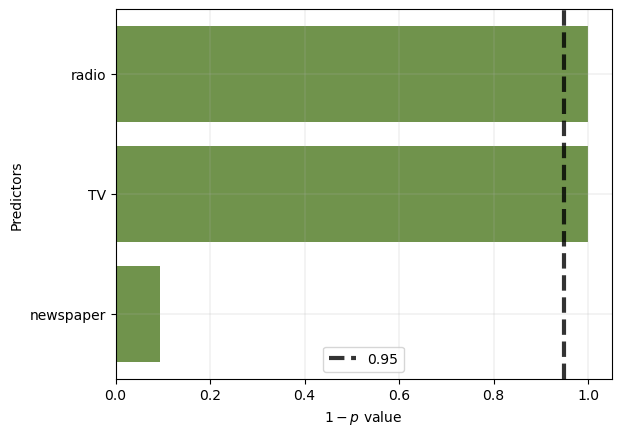

In [16]:
# Helper code below to visualise the confidence values
fig, ax = plt.subplots()
ax.barh(predictors,confs, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.axvline(x=0.95,linewidth=3,linestyle='--', color = 'black',alpha=0.8,label = '0.95')
ax.set_xlabel("$1-p$ value")
ax.set_ylabel("Predictors")
ax.legend()
plt.show();
